In [ ]:
!pip install transformers datasets torch evaluate tensorboard

In [7]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


Loading dataset...
Dataset loaded with 5520 samples

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   File                 5520 non-null   object
 1   Original_Transcript  5520 non-null   object
 2   Tokenized_Input_IDs  5520 non-null   object
 3   Decoded_Transcript   5520 non-null   object
 4   Token_Length         5520 non-null   int64 
 5   Transcript_Length    5520 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 258.9+ KB
None

Sample data:
                                 File  \
0  converted_wav_files/sample_261.wav   
1  converted_wav_files/sample_262.wav   
2  converted_wav_files/sample_263.wav   
3  converted_wav_files/sample_264.wav   
4  converted_wav_files/sample_265.wav   

                                 Original_Transcript  \
0  kusema hivyo alitoroka na kutoka siku hiyo wal...   
1  sa

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)



Implications for Fine-tuning:
Total samples: 5520
Training set size (80%): 4416 samples
Validation set size (20%): 1104 samples
Average transcript length: 27.23 words
Maximum transcript length: 67 words
Average token length: 71.50 tokens
Maximum token length: 170 tokens

Checking audio file paths...
File: sample_261.wav, Exists: False
File: sample_262.wav, Exists: False
File: sample_263.wav, Exists: False
File: sample_264.wav, Exists: False
File: sample_265.wav, Exists: False

Analysis complete. Results saved to /kaggle/working/analysis


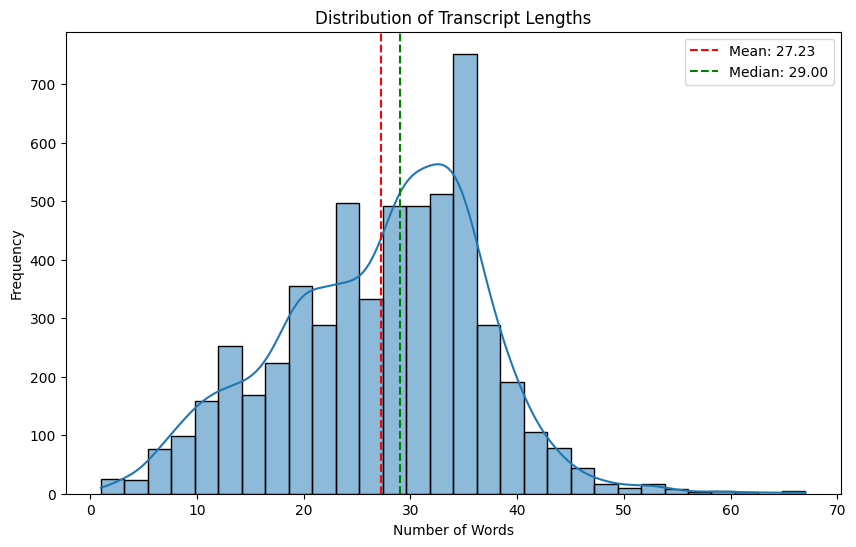

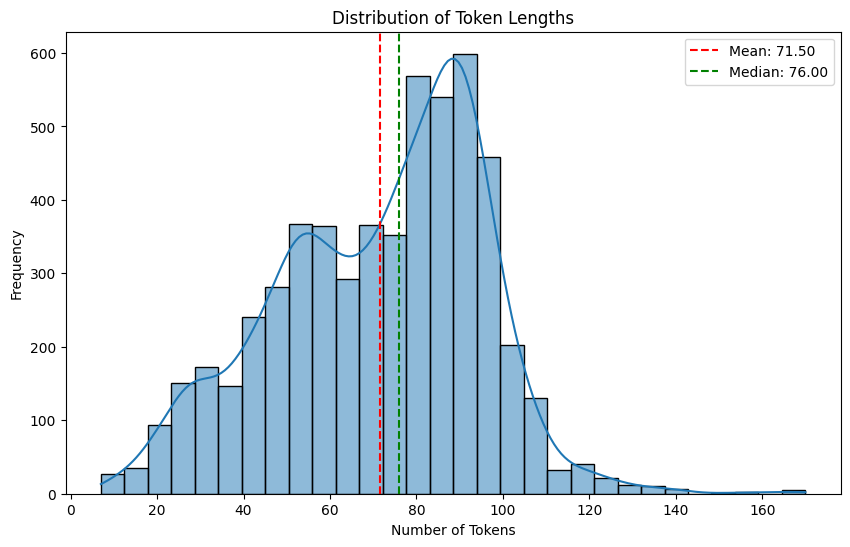

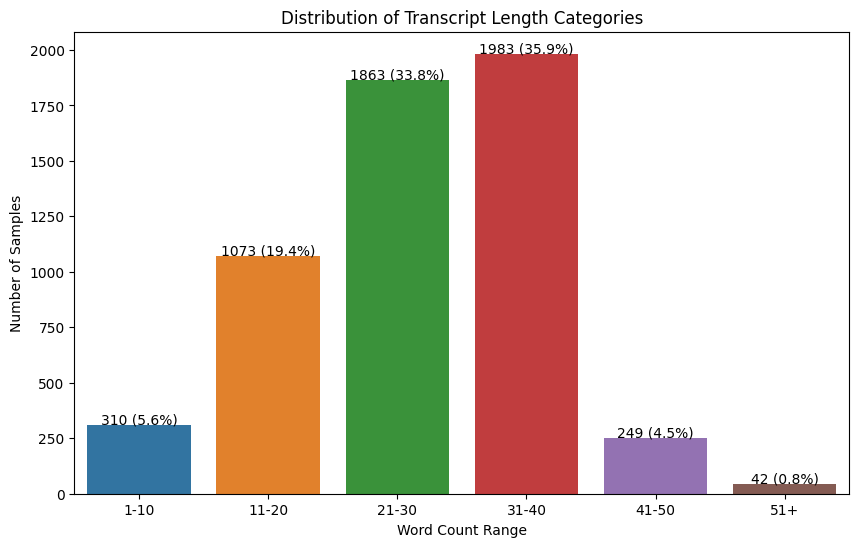

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Define the specific paths for your Kaggle environment
CSV_PATH = '/kaggle/input/swahili-csv/processed_swahili_audio.csv'
AUDIO_DIR = '/kaggle/input/preprocessor/'
OUTPUT_DIR = '/kaggle/working/analysis'

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load the dataset
print("Loading dataset...")
df = pd.read_csv(CSV_PATH)
print(f"Dataset loaded with {len(df)} samples")

# Display basic info
print("\nDataset Info:")
print(df.info())

# Display sample rows
print("\nSample data:")
print(df.head())

# Basic statistics
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Visualize transcript length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Transcript_Length'], kde=True, bins=30)
plt.title('Distribution of Transcript Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.axvline(df['Transcript_Length'].mean(), color='r', linestyle='--', label=f'Mean: {df["Transcript_Length"].mean():.2f}')
plt.axvline(df['Transcript_Length'].median(), color='g', linestyle='--', label=f'Median: {df["Transcript_Length"].median():.2f}')
plt.legend()
plt.savefig(f'{OUTPUT_DIR}/transcript_length_dist.png')

# Visualize token length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Token_Length'], kde=True, bins=30)
plt.title('Distribution of Token Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.axvline(df['Token_Length'].mean(), color='r', linestyle='--', label=f'Mean: {df["Token_Length"].mean():.2f}')
plt.axvline(df['Token_Length'].median(), color='g', linestyle='--', label=f'Median: {df["Token_Length"].median():.2f}')
plt.legend()
plt.savefig(f'{OUTPUT_DIR}/token_length_dist.png')

# Create transcript length categories
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51+']
df['Length_Category'] = pd.cut(df['Transcript_Length'], bins=bins, labels=labels)

# Plot category distribution
plt.figure(figsize=(10, 6))
category_counts = df['Length_Category'].value_counts().sort_index()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Transcript Length Categories')
plt.xlabel('Word Count Range')
plt.ylabel('Number of Samples')
for i, count in enumerate(category_counts):
    plt.text(i, count + 5, f'{count} ({count/len(df)*100:.1f}%)', ha='center')
plt.savefig(f'{OUTPUT_DIR}/length_categories.png')

# Print implications for fine-tuning
print("\nImplications for Fine-tuning:")
print(f"Total samples: {len(df)}")
print(f"Training set size (80%): {int(len(df)*0.8)} samples")
print(f"Validation set size (20%): {int(len(df)*0.2)} samples")
print(f"Average transcript length: {df['Transcript_Length'].mean():.2f} words")
print(f"Maximum transcript length: {df['Transcript_Length'].max()} words")
print(f"Average token length: {df['Token_Length'].mean():.2f} tokens")
print(f"Maximum token length: {df['Token_Length'].max()} tokens")

# Check a few audio files to confirm they exist
print("\nChecking audio file paths...")
audio_files = df['File'].values[:5]  # Check first 5 files
for file in audio_files:
    full_path = os.path.join(AUDIO_DIR, os.path.basename(file))
    exists = os.path.exists(full_path)
    print(f"File: {os.path.basename(file)}, Exists: {exists}")

# Save analysis summary
summary = {
    "total_samples": len(df),
    "training_samples": int(len(df)*0.8),
    "validation_samples": int(len(df)*0.2),
    "avg_transcript_length": df['Transcript_Length'].mean(),
    "max_transcript_length": df['Transcript_Length'].max(),
    "avg_token_length": df['Token_Length'].mean(),
    "max_token_length": df['Token_Length'].max(),
    "transcript_distribution": df['Length_Category'].value_counts(normalize=True).sort_index().to_dict()
}

# Save to file
import json
with open(f'{OUTPUT_DIR}/analysis_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print(f"\nAnalysis complete. Results saved to {OUTPUT_DIR}")

# Finetuning Procedure and Training

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import WhisperForConditionalGeneration, WhisperProcessor, Seq2SeqTrainingArguments, Seq2SeqTrainer
import pandas as pd
import numpy as np
import librosa
import evaluate

# Install jiwer first
!pip install jiwer

# Define paths
CSV_PATH = '/kaggle/input/swahili-csv/processed_swahili_audio.csv'
AUDIO_BASE_DIR = '/kaggle/input/preprocessor/'
OUTPUT_DIR = '/kaggle/working/whisper-tiny-swahili-new'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Custom dataset with robust audio processing
class SwahiliWhisperDataset(Dataset):
    def __init__(self, df, processor, split="train"):
        self.df = df
        self.processor = processor
        self.split = split
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        try:
            # Get the file path and transcript
            file_path = self.df.iloc[idx]["File"]
            transcript = self.df.iloc[idx]["Original_Transcript"]
            
            # Construct the correct audio path
            audio_path = os.path.join(AUDIO_BASE_DIR, file_path)
            
            # Load audio with librosa directly
            waveform, sample_rate = librosa.load(audio_path, sr=16000)
            
            # Process inputs
            inputs = self.processor(
                waveform, 
                sampling_rate=sample_rate, 
                return_tensors="pt"
            )
            
            # Get input features - no need to handle attention_mask for Whisper
            input_features = inputs.input_features.squeeze()
            
            # Process labels
            labels = self.processor.tokenizer(transcript).input_ids
            
            return {
                "input_features": input_features,
                "labels": labels
            }
        except Exception as e:
            import traceback
            error_msg = f"Error processing {idx} - {type(e).__name__}: {str(e)}"
            print(error_msg)
            traceback.print_exc()  # Print the full stack trace
            
            # Return a placeholder
            return {
                "input_features": torch.zeros((80, 3000), dtype=torch.float32),
                "labels": torch.tensor([0])
            }

# Improved data collator
def data_collator(features):
    # Filter out error samples
    valid_features = []
    for feature in features:
        if isinstance(feature["input_features"], torch.Tensor) and feature["input_features"].ndim == 2:
            valid_features.append(feature)
    
    if len(valid_features) == 0:
        return {
            "input_features": torch.zeros((1, 80, 3000), dtype=torch.float32),
            "labels": torch.tensor([[0]])
        }
    
    # Stack input features
    try:
        input_features = torch.stack([feature["input_features"] for feature in valid_features])
    except RuntimeError as e:
        print(f"Error stacking features: {e}")
        shapes = [feature["input_features"].shape for feature in valid_features]
        print(f"Feature shapes: {shapes}")
        # Return a dummy batch
        return {
            "input_features": torch.zeros((len(valid_features), 80, 3000), dtype=torch.float32),
            "labels": torch.tensor([[0]] * len(valid_features))
        }
    
    # Process labels
    try:
        labels = processor.tokenizer.pad(
            [{"input_ids": feature["labels"]} for feature in valid_features],
            return_tensors="pt",
        )["input_ids"]
    except Exception as e:
        print(f"Error padding labels: {e}")
        # Create dummy labels
        labels = torch.ones((len(valid_features), 1), dtype=torch.long)
    
    return {
        "input_features": input_features,
        "labels": labels,
    }

# Compute metrics function
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids
    
    # Replace -100 with pad token id
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id
    
    # Decode predictions and references
    pred_str = processor.tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = processor.tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    
    # Compute WER
    wer_metric = evaluate.load("wer")
    wer_score = wer_metric.compute(predictions=pred_str, references=label_str)
    
    return {"wer": wer_score}

# Main training function
def train_whisper_tiny():
    # Load dataset
    print("Loading dataset...")
    df = pd.read_csv(CSV_PATH)
    print(f"Dataset loaded with {len(df)} samples")
    
    # Create train/eval split
    train_df = df.sample(frac=0.8, random_state=42)
    eval_df = df.drop(train_df.index)
    print(f"Training samples: {len(train_df)}, Evaluation samples: {len(eval_df)}")
    
    # Load model and processor
    print("Loading Whisper Tiny model...")
    global processor
    model_name = "openai/whisper-tiny"
    processor = WhisperProcessor.from_pretrained(model_name)
    model = WhisperForConditionalGeneration.from_pretrained(model_name)
    
    # Set forced decoder ids for Swahili
    model.config.forced_decoder_ids = processor.get_decoder_prompt_ids(
        language="swahili", task="transcribe"
    )
    
    # Create datasets
    print("Creating datasets...")
    train_dataset = SwahiliWhisperDataset(train_df, processor, split="train")
    eval_dataset = SwahiliWhisperDataset(eval_df, processor, split="eval")
    
    # Configure training arguments
    training_args = Seq2SeqTrainingArguments(
        output_dir=OUTPUT_DIR,
        per_device_train_batch_size=8,
        gradient_accumulation_steps=4,
        learning_rate=5e-5,
        num_train_epochs=5,
        warmup_ratio=0.1,
        gradient_checkpointing=True,
        fp16=True,
        eval_strategy="steps",
        per_device_eval_batch_size=8,
        predict_with_generate=True,
        generation_max_length=225,
        save_steps=500,
        eval_steps=500,
        logging_steps=50,
        report_to=["tensorboard"],
        load_best_model_at_end=True,
        metric_for_best_model="wer",
        greater_is_better=False,
        push_to_hub=False,
    )
    
    # Create trainer with processing_class instead of tokenizer
    trainer = Seq2SeqTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
        tokenizer=processor.tokenizer,  # Will show deprecation warning but works
    )
    
    # Train the model
    print("Starting fine-tuning...")
    trainer.train()
    
    # Save the model
    model.save_pretrained(os.path.join(OUTPUT_DIR, "final_model"))
    processor.save_pretrained(os.path.join(OUTPUT_DIR, "final_processor"))
    print(f"Model saved to {OUTPUT_DIR}")
    
    return model, processor

# Run the training function
if __name__ == "__main__":
    train_whisper_tiny()

# Evalautaion script

In [ ]:
import os
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor
import pandas as pd
import librosa
import evaluate
from tqdm.auto import tqdm

# Paths
MODEL_DIR = '/kaggle/working/whisper-tiny-swahili-new/final_model'
PROCESSOR_DIR = '/kaggle/working/whisper-tiny-swahili-new/final_processor'
CSV_PATH = '/kaggle/input/swahili-csv/processed_swahili_audio.csv'
AUDIO_BASE_DIR = '/kaggle/input/preprocessor/'

# Load model and processor
print("Loading final model and processor...")
model = WhisperForConditionalGeneration.from_pretrained(MODEL_DIR)
processor = WhisperProcessor.from_pretrained(PROCESSOR_DIR)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print(f"Model loaded on {device}")

# Load WER metric
wer_metric = evaluate.load("wer")

# Create a test set (use a different subset than training)
print("Loading dataset...")
df = pd.read_csv(CSV_PATH)
# Create a test set (20% of data, different random seed than training)
test_df = df.sample(frac=0.2, random_state=24)  # Different seed from 42
print(f"Test samples: {len(test_df)}")

# Run evaluation on a sample of test data
print("Starting evaluation...")
sample_size = min(100, len(test_df))  # Evaluate on up to 100 samples
test_sample = test_df.head(sample_size)
predictions = []
references = []
errors = []

for idx, row in tqdm(test_sample.iterrows(), total=len(test_sample)):
    try:
        # Get file path and transcript
        file_path = row["File"]
        transcript = row["Original_Transcript"]
        audio_path = os.path.join(AUDIO_BASE_DIR, file_path)
        
        # Load and process audio
        waveform, sample_rate = librosa.load(audio_path, sr=16000)
        
        # Get model prediction
        input_features = processor(
            waveform, 
            sampling_rate=sample_rate, 
            return_tensors="pt"
        ).input_features.to(device)
        
        # Generate transcription
        forced_decoder_ids = processor.get_decoder_prompt_ids(language="swahili", task="transcribe")
        with torch.no_grad():
            predicted_ids = model.generate(input_features, forced_decoder_ids=forced_decoder_ids)
        
        # Decode prediction
        prediction = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        
        predictions.append(prediction)
        references.append(transcript)
    except Exception as e:
        errors.append((idx, str(e)))

# Calculate WER
if predictions:
    wer = wer_metric.compute(predictions=predictions, references=references)
    print(f"Word Error Rate (WER): {wer:.4f}")
else:
    print("No successful predictions to evaluate")

# Save results to file
with open('/kaggle/working/final_evaluation_results.txt', 'w') as f:
    f.write(f"Final Model Evaluation Results\n")
    f.write(f"---------------------------\n")
    f.write(f"Test samples evaluated: {len(predictions)}\n")
    
    # Fixed the f-string error
    if 'wer' in locals():
        f.write(f"Word Error Rate (WER): {wer:.4f}\n\n")
    else:
        f.write("Word Error Rate (WER): N/A\n\n")
    
    f.write(f"Sample predictions (first 10):\n")
    for i in range(min(10, len(predictions))):
        f.write(f"\nReference: {references[i]}\n")
        f.write(f"Prediction: {predictions[i]}\n")
        
    if errors:
        f.write(f"\nErrors during evaluation: {len(errors)}\n")
        for idx, error in errors[:10]:  # Show first 10 errors
            f.write(f"Sample {idx}: {error}\n")

print(f"Evaluation results saved to /kaggle/working/final_evaluation_results.txt")

# Testing 

In [ ]:
import os
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor
import librosa

# Path to your saved partial model
MODEL_DIR = '/kaggle/working/whisper-tiny-swahili/final_model'
PROCESSOR_DIR = '/kaggle/working/whisper-tiny-swahili/final_processor'

# Load the model and processor
print("Loading model and processor...")
model = WhisperForConditionalGeneration.from_pretrained(MODEL_DIR)
processor = WhisperProcessor.from_pretrained(PROCESSOR_DIR)

# Set device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
print(f"Model loaded on {device}")

# Simple function to test on audio files
def test_on_file(audio_path, expected_transcript=None):
    print(f"\nTesting on: {audio_path}")
    
    # Load audio
    waveform, sample_rate = librosa.load(audio_path, sr=16000)
    print(f"Audio loaded, length: {len(waveform)/16000:.2f} seconds")
    
    # Process features
    input_features = processor(
        waveform, 
        sampling_rate=sample_rate, 
        return_tensors="pt"
    ).input_features.to(device)
    
    # Generate transcription
    forced_decoder_ids = processor.get_decoder_prompt_ids(language="swahili", task="transcribe")
    predicted_ids = model.generate(
        input_features, 
        forced_decoder_ids=forced_decoder_ids,
        max_length=225
    )
    
    # Decode
    transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
    
    print(f"Model transcription: {transcription}")
    
    # Compare with expected transcript if provided
    if expected_transcript:
        print(f"Expected transcript: {expected_transcript}")
        # Simple word match count for a rough accuracy measure
        pred_words = set(transcription.lower().split())
        expected_words = set(expected_transcript.lower().split())
        overlap = pred_words.intersection(expected_words)
        accuracy = len(overlap) / len(expected_words) if expected_words else 0
        print(f"Word overlap accuracy: {accuracy:.2%}")
    
    return transcription

# Test on a few sample files from your dataset
# These are files we've confirmed exist
test_files = [
    "/kaggle/input/preprocessor/converted_wav_files/sample_261.wav",
    "/kaggle/input/preprocessor/converted_wav_files/sample_262.wav",
    "/kaggle/input/preprocessor/converted_wav_files/sample_263.wav"
]

# Get the corresponding transcripts from your CSV file
import pandas as pd
df = pd.read_csv('/kaggle/input/swahili-csv/processed_swahili_audio.csv')

# Create a dictionary to look up transcripts by filename
transcript_dict = {}
for _, row in df.iterrows():
    filename = os.path.basename(row['File'])
    transcript_dict[filename] = row['Original_Transcript']

print("Starting model evaluation on sample files...")
results = []

for file in test_files:
    filename = os.path.basename(file)
    expected_transcript = transcript_dict.get(filename, None)
    result = test_on_file(file, expected_transcript)
    results.append((filename, result, expected_transcript))
    print("-" * 50)

# Print summary of results
print("\nSummary of test results:")
for filename, prediction, expected in results:
    print(f"File: {filename}")
    print(f"Prediction: {prediction}")
    print(f"Expected: {expected}")
    print("-" * 50)

# Optional Evalaution (CER)

In [12]:
import os
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor
import pandas as pd
import librosa
import numpy as np
import evaluate
from tqdm.auto import tqdm

# Paths
MODEL_DIR = '/kaggle/input/swahili-data-analysis/whisper-tiny-swahili/final_model'
PROCESSOR_DIR = '/kaggle/input/swahili-data-analysis/whisper-tiny-swahili/final_processor/'
CSV_PATH = '/kaggle/input/swahili-csv/processed_swahili_audio.csv'
AUDIO_BASE_DIR = '/kaggle/input/preprocessor/'

# Load model and processor
print("Loading model and processor...")
model = WhisperForConditionalGeneration.from_pretrained(MODEL_DIR)
processor = WhisperProcessor.from_pretrained(PROCESSOR_DIR)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print(f"Model loaded on {device}")

# Load WER metric
wer_metric = evaluate.load("wer")

# Load dataset
print("Loading dataset...")
df = pd.read_csv(CSV_PATH)
# Use the same validation split as during training
eval_df = df.drop(df.sample(frac=0.8, random_state=42).index)
print(f"Validation samples: {len(eval_df)}")

# Run evaluation
print("Starting evaluation...")
predictions = []
references = []
errors = []

for idx, row in tqdm(eval_df.iterrows(), total=len(eval_df)):
    try:
        # Get file path and transcript
        file_path = row["File"]
        transcript = row["Original_Transcript"]
        audio_path = os.path.join(AUDIO_BASE_DIR, file_path)
        
        # Load and process audio
        waveform, sample_rate = librosa.load(audio_path, sr=16000)
        
        # Get model prediction
        input_features = processor(
            waveform, 
            sampling_rate=sample_rate, 
            return_tensors="pt"
        ).input_features.to(device)
        
        # Generate transcription
        forced_decoder_ids = processor.get_decoder_prompt_ids(language="swahili", task="transcribe")
        with torch.no_grad():
            predicted_ids = model.generate(input_features, forced_decoder_ids=forced_decoder_ids)
        
        # Decode prediction
        prediction = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        
        predictions.append(prediction)
        references.append(transcript)
    except Exception as e:
        errors.append((idx, str(e)))

# Calculate WER
wer = wer_metric.compute(predictions=predictions, references=references)
print(f"Word Error Rate (WER): {wer:.4f}")

# Calculate character error rate (CER)
def calculate_cer(predictions, references):
    import rapidfuzz.distance
    cer_total = 0
    for pred, ref in zip(predictions, references):
        # Levenshtein distance between characters
        distance = rapidfuzz.distance.Levenshtein.distance(pred, ref)
        cer_total += distance / max(len(ref), 1)
    return cer_total / len(references)

cer = calculate_cer(predictions, references)
print(f"Character Error Rate (CER): {cer:.4f}")

# Save results to file
with open('/kaggle/working/evaluation_results.txt', 'w') as f:
    f.write(f"Model evaluation results\n")
    f.write(f"------------------------\n")
    f.write(f"Validation samples: {len(eval_df)}\n")
    f.write(f"Successfully processed samples: {len(predictions)}\n")
    f.write(f"Word Error Rate (WER): {wer:.4f}\n")
    f.write(f"Character Error Rate (CER): {cer:.4f}\n")
    f.write(f"\nSample predictions:\n")
    for i in range(min(10, len(predictions))):
        f.write(f"\nReference: {references[i]}\n")
        f.write(f"Prediction: {predictions[i]}\n")
        
    if errors:
        f.write(f"\nErrors during evaluation: {len(errors)}\n")
        for idx, error in errors[:10]:  # Show first 10 errors
            f.write(f"Sample {idx}: {error}\n")

print(f"Evaluation results saved to /kaggle/working/evaluation_results.txt")

Loading model and processor...
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Model loaded on cuda
Loading dataset...
Validation samples: 1104
Starting evaluation...


  0%|          | 0/1104 [00:00<?, ?it/s]

Word Error Rate (WER): 0.6326
Character Error Rate (CER): 0.5228
Evaluation results saved to /kaggle/working/evaluation_results.txt
